# Introduction to regression with Neural Networks in TensorFlow

Ther are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variable.

In [ ]:
import tensorflow as tf

In [ ]:
tf.config.list_physical_devices("GPU")


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Creating some data to view and fit

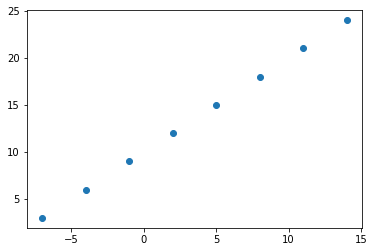

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Creat labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [ ]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model
2. Compiling a model - define the loss function. and the optimizer and evaluation metrics.
3. Fitting a model - letting the model try to find patterns between X & y

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create the model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (neurons), within each layers, change the activation functions.

2. **Compiling a model** - change the optimization function or the **learning rate** of the optimization function.

3. **Fitting a model** - do more epochs or on more data.

In [ ]:
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 626ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[29.739855]], dtype=float32)

In [ ]:
# Making other changes
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None), 
  tf.keras.layers.Dense(1)                             
])

#2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4149 - mae: 10.4149
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0103 - mae: 9.0103
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.3316 - mae: 7.3316
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - l

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([47])
y_pred

array([[55.76155]], dtype=float32)

## Evaluating a model

In practice a typical workflow when building NN is:

Build a model -> fit -> evaluate it -> tweak -> fit -> evaluate -> ...


When it comes to evaluation... there are 3 word to memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with, what does it look like
* The model itself - What does the model look like
* The training of a model
* The predictions of the model

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

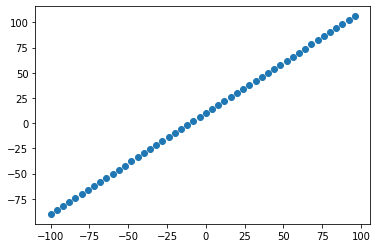

In [ ]:
# Visualize the data
plt.scatter(X,y)

### The 3 sets...

* Training set - the model learns from this data 70-80% of data
* Validation set - model gets tuned on this data 10-15% of data
* Test set - the model gets evaluated on this data to test what it has learned 10-15% of data

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # 80% of data
X_test = X[40:] # 20 % of data

y_train = y[:40] # 80% of data
y_test = y[40:] # 20 % of data

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

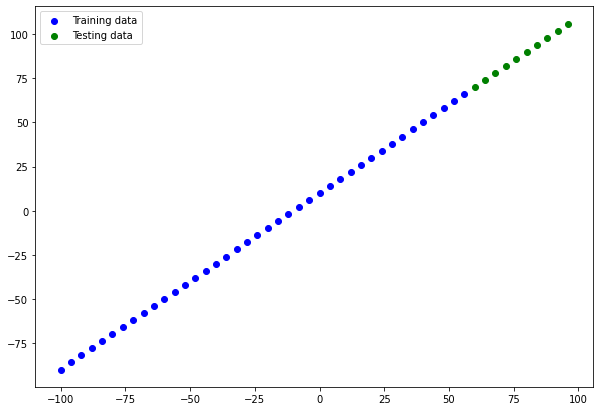

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot testing data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

plt.legend()

In [ ]:
# Let's have a look at how to build a NN for our data

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

#2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


### Visualizing the model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # define the input_shape to our model
  tf.keras.layers.Dense(10, name="hidden_layer_1"),
  tf.keras.layers.Dense(1, name="output_layer") # define the input_shape to our model
], name="Model")

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 hidden_layer_1 (Dense)      (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - paramaters the model can update as it trains
* Non-trainable params - parameters not updated during training (when you bring in paramaters from other models during transfer learning)

In [ ]:
# Fit the model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # verbose controls how much gets output

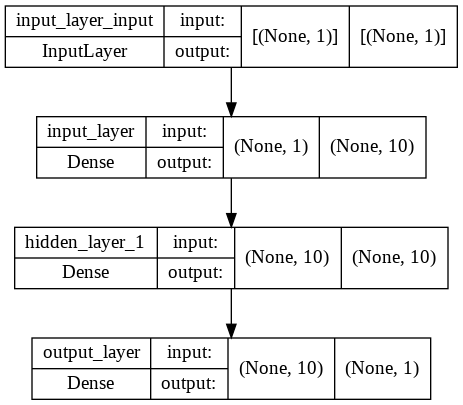

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Vizualizing our model's predictions

To visualize predictions, it's a good idea to plot then against the ground truth labels

Often you'll see y_test or y_true vs y_pred

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 71.61788 ],
       [ 75.73044 ],
       [ 79.84299 ],
       [ 83.95554 ],
       [ 88.06809 ],
       [ 92.18064 ],
       [ 96.293205],
       [100.405754],
       [104.5183  ],
       [108.63086 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
  """
  Plots training data, test data and compare predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions data")

  plt.legend()



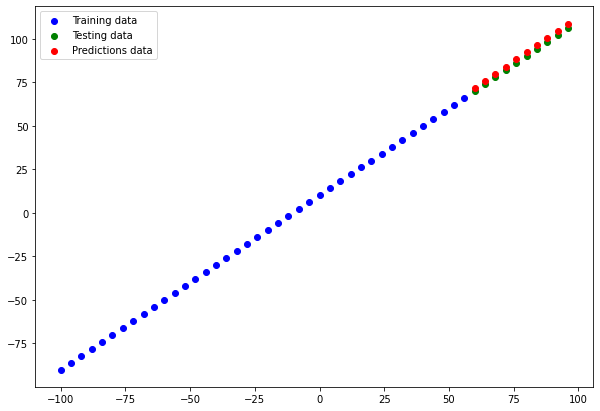

In [ ]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics


In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 271ms/step - loss: 2.1244 - mae: 2.1244


[2.124370574951172, 2.124370574951172]

In [ ]:
# Calculate the mean absolute error
tf.reduce_sum(tf.abs(tf.constant(y_pred, shape=(10,))-tf.cast(y_test, dtype=tf.float32)))/10

<tf.Tensor: shape=(), dtype=float32, numpy=2.1243706>

In [ ]:
tf.metrics.mean_absolute_error(tf.cast(y_test, dtype=tf.float32), tf.constant(y_pred, shape=(10,)))

<tf.Tensor: shape=(), dtype=float32, numpy=2.1243706>

In [ ]:
# Calculate the mean square error
tf.keras.losses.MSE(tf.cast(y_test, dtype=tf.float32), tf.constant(y_pred, shape=(10,)))

<tf.Tensor: shape=(), dtype=float32, numpy=4.6174626>

In [ ]:
tf.metrics.mean_squared_error(tf.cast(y_test, dtype=tf.float32), tf.constant(y_pred, shape=(10,)))

<tf.Tensor: shape=(), dtype=float32, numpy=4.6174626>

### Running experiments to improve our model

1. Get more data - get more example for your model to train on (more opportunities to learn patterns or relantionship between features and labels).
2. Make you model larger - more layers or more hidden units
3. Train for longer - give your model more of a chance

Let's do 3 modelling experiments:

1. model_1 - same as original model, 1 layer trained for 100 epochs
2. model_2 - 2 layers for 100 epochs
3. model_3 - 2 layers for 500 epochs

**Build model_1**

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
], name="Model_1")

# Compile model (same as above)
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

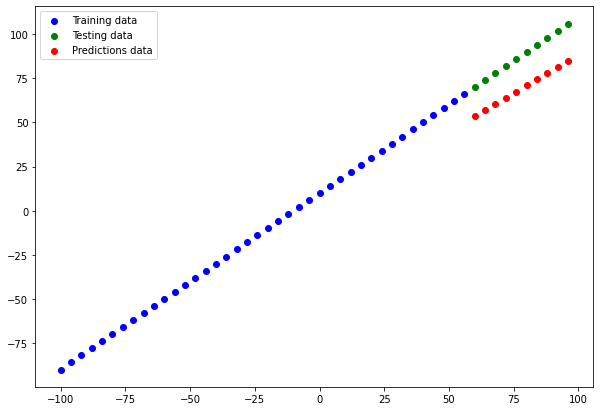

In [ ]:
# Make and plot predictions for model_1

y_pred_1 = model_1.predict(X_test)
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred_1)

In [ ]:
# Calculate model_1 evaluation metrics

mae_1 = tf.metrics.mean_absolute_error(tf.cast(y_test, dtype=tf.float32), tf.constant(y_pred_1, shape=(10,)))
mse_1 = tf.metrics.mean_squared_error(tf.cast(y_test, dtype=tf.float32), tf.constant(y_pred_1, shape=(10,)))

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

**Build model_2**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
], name="Model_2")

# Compile model (same as above)
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 9ms

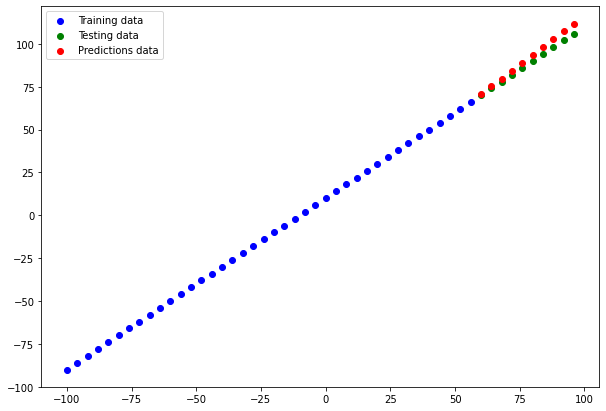

In [ ]:
# Make and plot predictions for model_2

y_pred_2 = model_2.predict(X_test)
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred_2)

In [ ]:
# Calculate model_2 evaluation metrics

mae_2 = tf.metrics.mean_absolute_error(tf.cast(y_test, dtype=tf.float32), tf.constant(y_pred_2, shape=(10,)))
mse_2 = tf.metrics.mean_squared_error(tf.cast(y_test, dtype=tf.float32), tf.constant(y_pred_2, shape=(10,)))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070175>)

**Build model_3**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
], name="Model_3")

# Compile model (same as above)
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 6ms/

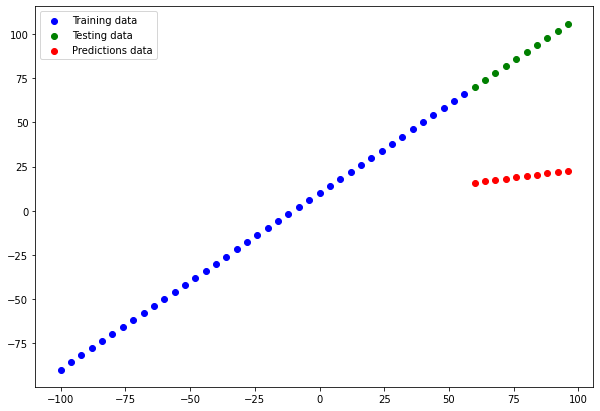

In [ ]:
# Make and plot predictions for model_3

y_pred_3 = model_3.predict(X_test)
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred_3)

In [ ]:
# Calculate model_3 evaluation metrics

mae_3 = tf.metrics.mean_absolute_error(tf.cast(y_test, dtype=tf.float32), tf.constant(y_pred_3, shape=(10,)))
mse_3 = tf.metrics.mean_squared_error(tf.cast(y_test, dtype=tf.float32), tf.constant(y_pred_3, shape=(10,)))

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71362>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0283>)

## Comparing the results of our experiments

In [ ]:
# Let's compare our models using pandas

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,3.196947,13.070175
2,model_3,68.713623,4808.028320


## Tracking your experiments

* TensorBoard
* Weights & Biases

## Saving our models

It allows us to use our models outside of google collab

1. The SavedModel format
2. HDF5 format

In [ ]:
# Save a model
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Save a model using HDF5
model_2.save("best_model_HDF5_format.h5")

## Load a model

In [ ]:
new_model_SavedModel = tf.keras.models.load_model("/content/best_model_SavedModel_format")
new_model_SavedModel.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 and loaded model
model_2_pred = model_2.predict(X_test)
new_model_SavedModel_pred = new_model_SavedModel.predict(X_test)

model_2_pred, new_model_SavedModel_pred

(array([[ 70.55219 ],
        [ 75.139915],
        [ 79.72764 ],
        [ 84.31536 ],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66626 ],
        [107.253975],
        [111.841705]], dtype=float32), array([[ 70.55219 ],
        [ 75.139915],
        [ 79.72764 ],
        [ 84.31536 ],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66626 ],
        [107.253975],
        [111.841705]], dtype=float32))

In [ ]:
new_model_HDF5 = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
new_model_HDF5.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# A Larger Example

In [ ]:
# Import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the insurance dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot = pd.get_dummies(insurance) # one hot encode object categories
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Define the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"), 
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)                            
], name="Insurance_model")

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=["mae"]
)

# Fit the model, no need to convert to tensor because it's pandas
history = model.fit(X_train, y_train, epochs=200)
    

Epoch 1/200
34/34 [==============================] - 0s 3ms/step - loss: 13249.3750 - mae: 13249.3750
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 12519.3906 - mae: 12519.3906
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 9978.4150 - mae: 9978.4150
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 7532.8242 - mae: 7532.8242
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7417.7407 - mae: 7417.7407
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 7372.8989 - mae: 7372.8989
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7308.8262 - mae: 7308.8262
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7254.8955 - mae: 7254.8955
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7199.9204 - mae: 7199.9204
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7142.5210 - mae: 7142.

In [ ]:
# Check the result of the insurance model on the test data
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2014.2129 - mae: 2014.2129


[2014.212890625, 2014.212890625]

In [ ]:
y_pred = model.predict(X_test)

Text(0.5, 0, 'epochs')

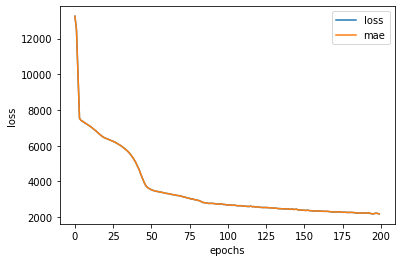

In [ ]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

* NN prefer normalization
* Can try both see which performs better

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from re import M
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal.shape

(1070, 11)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
norm_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name="Insurance_norm_model")

# Compile the model
norm_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)

#Fit the model
history_norm = norm_model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13333.4795 - mae: 13333.4795
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 13066.4482 - mae: 13066.4482
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 11925.96

In [ ]:
# Evaluate the model
norm_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5781 - mae: 3171.5781


[3171.578125, 3171.578125]

Text(0.5, 0, 'epochs')

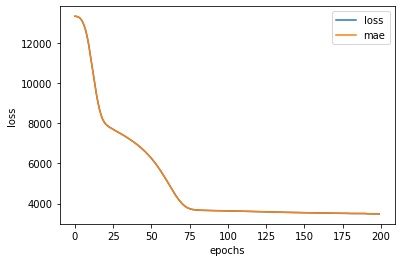

In [ ]:
# Plot history
pd.DataFrame(history_norm.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
train_set, test_set = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [ ]:
train_set[1].shape, test_set[0].shape

((404,), (102, 13))

In [ ]:
X_train = train_set[0]
y_train = train_set[1]

X_test = test_set[0]
y_test = test_set[1]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
boston_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit the model
history = boston_model.fit(X_train, y_train, epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 4ms/step - loss: 63.9683 - mae: 63.9683
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 14.3407 - mae: 14.3407
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 8.9179 - mae: 8.9179
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 6.7388 - mae: 6.7388
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 5.9616 - mae: 5.9616
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 5.6705 - mae: 5.6705
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 5.5187 - mae: 5.5187
Epoch 8/200
13/13 [==============================] - 0s 4ms/step - loss: 5.4612 - mae: 5.4612
Epoch 9/200
13/13 [==============================] - 0s 4ms/step - loss: 5.2253 - mae: 5.2253
Epoch 10/200
13/13 [==============================] - 0s 4ms/step - loss: 5.1416 - mae: 5.1416
Epoch 11/200
13/13 [==============================] - 0

Text(0.5, 0, 'epochs')

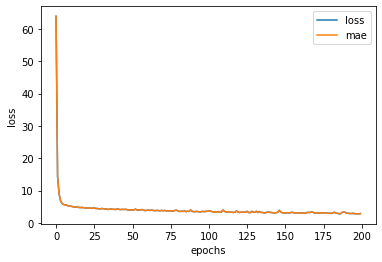

In [ ]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
boston_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.3069 - mae: 3.3069


[3.306873083114624, 3.306873083114624]